# Minimizing churn

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
dataset=pd.read_csv('churn_data.csv')

# Data Cleaning

In [14]:
dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [16]:
dataset.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [17]:
dataset.isna()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26996,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26997,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
dataset.isna().any()

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [19]:
dataset.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [20]:
dataset= dataset[pd.notnull(dataset['age'])]

In [21]:
dataset=dataset.drop(columns=['credit_score','rewards_earned'])

In [22]:
dataset2=dataset.drop(columns=['user','churn'])

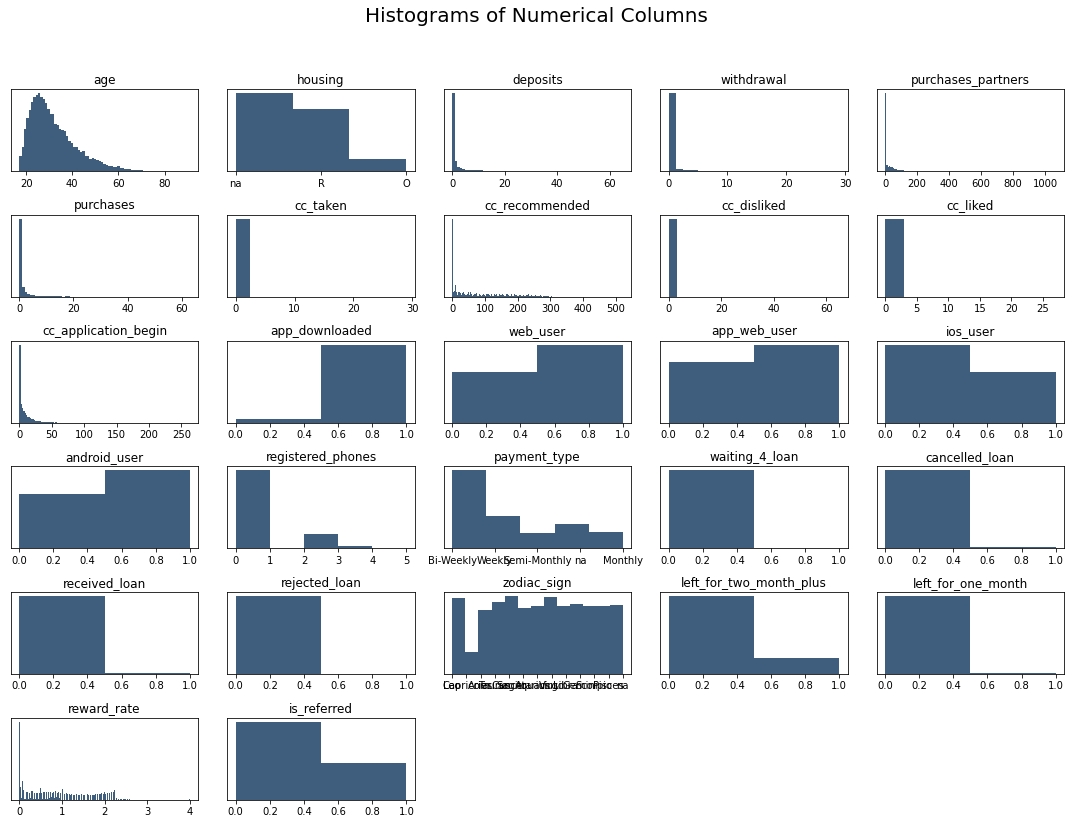

In [23]:
fig=plt.figure(figsize=(15,12))
plt.suptitle('Histograms of Numerical Columns',fontsize=20)
for i in range(1,dataset2.shape[1]+1):
    plt.subplot(6,5,i)
    f=plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i-1])
    vals=np.size(dataset2.iloc[:,i-1].unique())
    plt.hist(dataset2.iloc[:,i-1],bins=vals,color='#3F5D7D')
plt.tight_layout(rect=[0,0.03,1,0.95])

# Correlation Plot

<AxesSubplot:title={'center':'Correlation with the response variable'}>

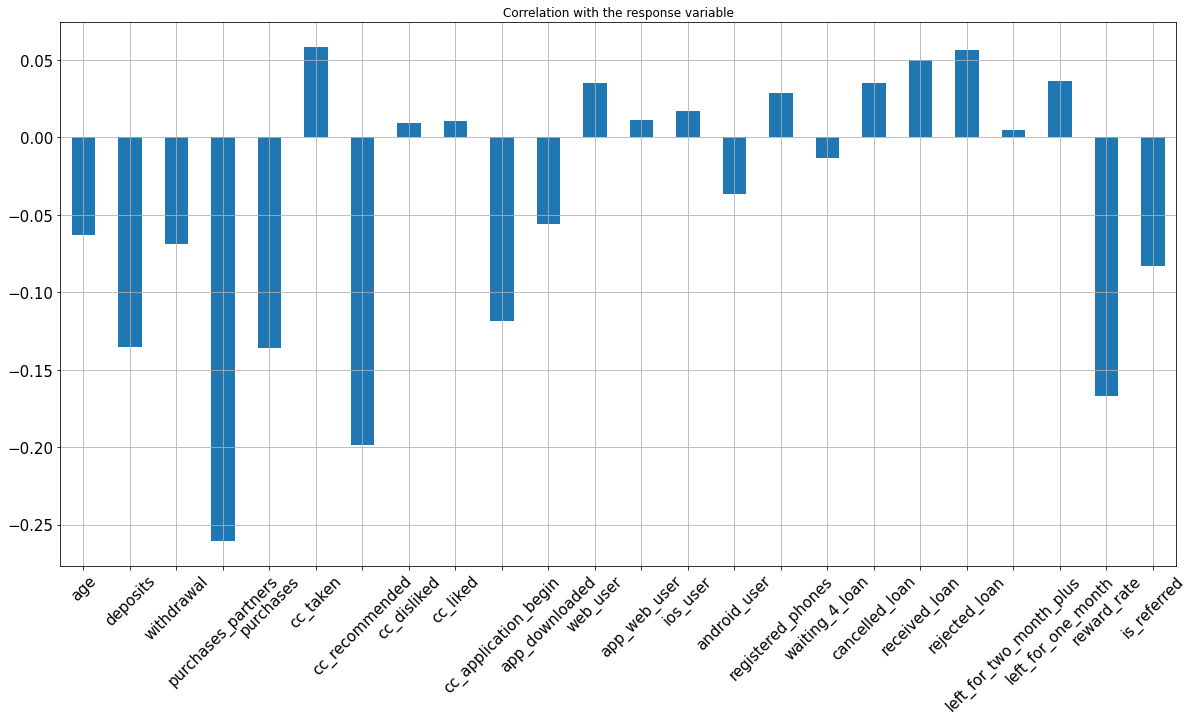

In [25]:
dataset.drop(columns=['churn','user','housing','payment_type','zodiac_sign']).corrwith(dataset.churn).plot.bar(figsize=(20,10),title='Correlation with the response variable',fontsize=15,rot=45,grid=True)# morelikely to churn

# Correlation Matrix

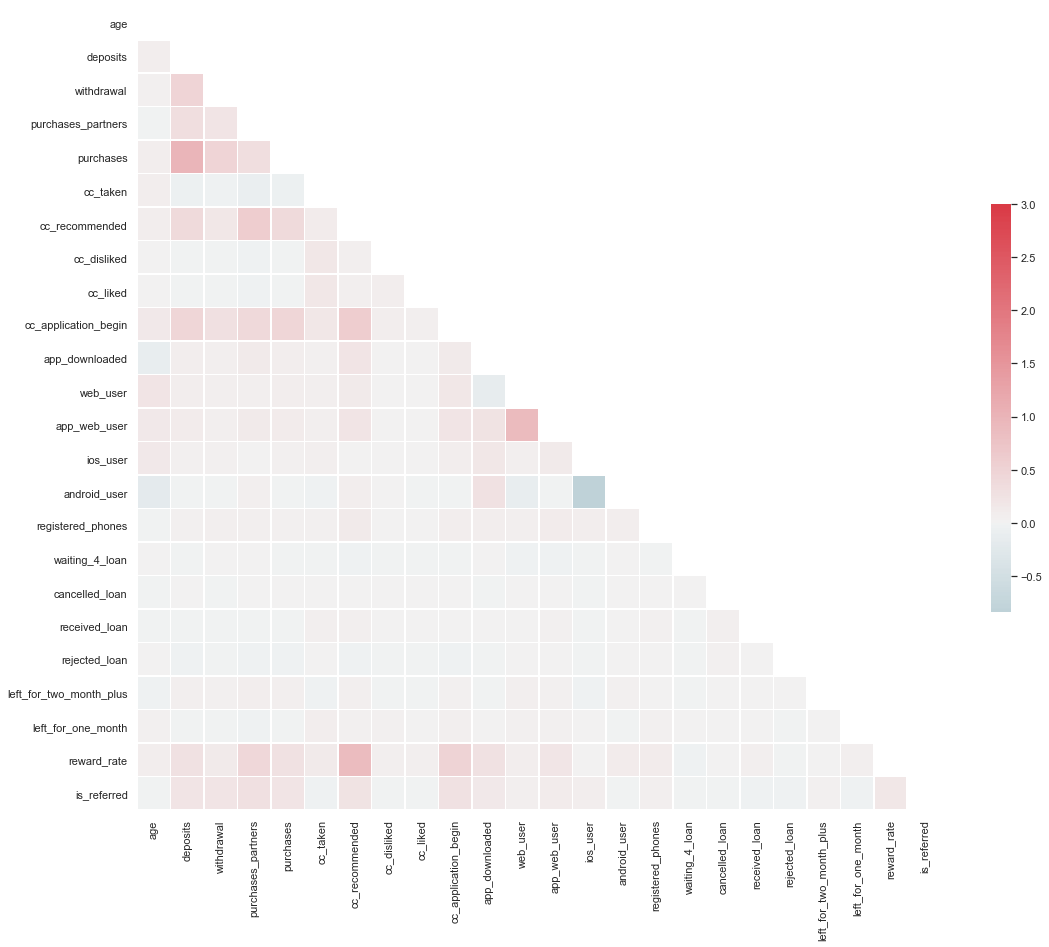

In [28]:
sn.set(style='white')
corr=dataset.drop(columns=['user','churn']).corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
f,ax=plt.subplots(figsize=(18,15))
cmap=sn.diverging_palette(220,10,as_cmap=True)
sn.heatmap(corr,mask=mask,cmap=cmap,vmax=3,center=0,square=True,linewidth=.5,cbar_kws={"shrink":.5})
dataset=dataset.drop(columns=['app_web_user'])
dataset.to_csv('new_churn_data.csv',index=False)

In [4]:
#data preparation
import pandas as pd
import random
dataset=pd.read_csv('new_churn_data.csv')
user_identifier=dataset['user']
dataset=dataset.drop(columns=['user'])
dataset.housing.value_counts()
dataset=pd.get_dummies(dataset)
dataset.columns
dataset=dataset.drop(columns=['housing_na','zodiac_sign_na','payment_type_na'])

# Train-test dataset

In [40]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns=['churn']), dataset.churn, 
                                                    test_size=0.2, random_state=0)

In [24]:
y_train.value_counts()

0    8940
1    8940
Name: churn, dtype: int64

In [25]:
pos_index=y_train[y_train.values==1].index
neg_index=y_train[y_train.values==0].index

In [26]:
if len(pos_index) >len(neg_index):
    higher=pos_index
    lower=neg_index
else:
    higher=neg_index
    lower=pos_index

In [27]:
import numpy as np
random.seed(0)

# setting the seed so that everytime we get the same values

# remember higher is a list of indexes, either of 0 or 1's in the response variable in training set
higher=np.random.choice(higher, size=len(lower))

# It will randomly select indices of higher (be it 0's or 1's). and subset it to the length of lower indices.
# e.g. say in the response variable there are 50 rows, out of which 30 are 1's and 20 are 0's.
# Higher will contain the list of indices that have value 1, and there are 30 of it. Now we will subset these into the
# length of lower which is 20, so we are randomly selecting 20 indices out of 20 from higher (which is a list of indices)


In [35]:
lower=np.asarray(lower)
# Because now higher is stored as np array, for consistency we convert lower also to a numpy array

# Now our lower and higher (both are list of indices) are of same length.

new_indexes=np.concatenate((lower,higher))
# Combining lower and higher indexes, both of which have the same size

X_train=X_train.loc[new_indexes,]
#Subsetting the X_train using new_indexes which have proportionate values of response variable, .loc selects the rows
#.loc[row_index] and .loc[row_index,] does the same thing, selects the row number from index provided and all the columns

y_train=y_train.loc[new_indexes]
#Subsetting the y_train as well, so that it also holds equal proportion of the response variable

# Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

X_train2 = pd.DataFrame(scalar.fit_transform(X_train))
X_test2= pd.DataFrame(scalar.fit_transform(X_test))

# The reason I converted it into dataframe after transformation (normalization) is scalar returns a numpy array, 
# multidimensional number array, and when we do that, we lose the index of the rows and the column names. I saved it as another
# dataframe having 2 as suffix is because i don't want to alter the original df and lose its index and column names

X_train2.columns=X_train.columns.values
X_test2.columns=X_test.columns.values

X_train2.index=X_train.index.values
X_test2.index=X_test.index.values

In [44]:

X_train=X_train2
X_test=X_test2

In [45]:
X_test.head()

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
2834,0.004040,0.868055,-0.291026,-0.655340,0.894374,2.335414,1.227740,-0.058114,-0.039498,1.861847,...,-0.329203,-0.170762,-0.295625,-0.309123,-0.280929,-0.293025,3.584153,-0.285127,-0.304062,-0.311275
21018,-0.706304,-0.360500,-0.291026,2.488687,-0.360310,-0.182804,1.693278,-0.058114,-0.039498,-0.406119,...,-0.329203,-0.170762,3.382661,-0.309123,-0.280929,-0.293025,-0.279006,-0.285127,-0.304062,-0.311275
5590,1.526208,0.868055,1.672175,-0.680096,0.894374,-0.182804,0.421564,2.199566,-0.039498,2.185842,...,-0.329203,-0.170762,-0.295625,-0.309123,-0.280929,-0.293025,-0.279006,-0.285127,3.288798,-0.311275
15769,0.105518,-0.360500,-0.291026,-0.482047,-0.360310,-0.182804,-1.009114,-0.058114,-0.039498,-0.568116,...,-0.329203,5.856118,-0.295625,-0.309123,-0.280929,-0.293025,-0.279006,-0.285127,-0.304062,-0.311275
15120,-1.010738,0.309621,-0.291026,3.206614,0.324063,-0.182804,1.727342,-0.058114,-0.039498,2.104843,...,-0.329203,-0.170762,-0.295625,3.234960,-0.280929,-0.293025,-0.279006,-0.285127,-0.304062,-0.311275


# Model Building

In [46]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [47]:
y_predict = classifier.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

cm=confusion_matrix(y_test,y_predict)

In [55]:

accuracy_score(y_test,y_predict)

0.6425925925925926

In [56]:
precision_score(y_test,y_predict)

0.5804232804232804

In [57]:
recall_score(y_test,y_predict)

0.491047448522829

In [58]:
f1_score(y_test,y_predict)


0.532007759456838